# U.S. Medical Insurance Costs


### Visualising the data

In [17]:
#Import modules
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.figure as figure
from matplotlib import colors
from sklearn.feature_selection import mutual_info_regression, f_regression
%matplotlib inline
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}

In [5]:
#Opening the CSV
with open(r"C:\Users\Josh\Documents\Projects\US Medical Costs\insurance.csv", newline = '') as CSVfile:
    writer = csv.DictReader(CSVfile)
    age_list = []
    sex_list = []
    bmi_list = []
    children_list = []
    smoker_list = []
    region_list = []
    charges_list = []
    for row in writer:
        age_list.append(row["age"])
        sex_list.append(row["sex"])
        bmi_list.append(row["bmi"])
        children_list.append(row["children"])
        smoker_list.append(row["smoker"])
        region_list.append(row["region"])
        charges_list.append(row["charges"])

In [54]:
#Turning the lists into numbered numpy arrays for calculations
age_list = np.asarray(age_list).astype(int)
bmi_list = np.asarray(bmi_list).astype(float)
children_list = np.asarray(children_list).astype(int)
charges_list = np.asarray(charges_list).astype(float)


In [15]:
#Define histogram plotting functions
# returns a fixed set of bin edges
def fixedbinning(xmin, xmax, nbins):
  return np.mgrid[xmin:xmax:nbins*1j]


# define two functions to aid in plotting
def hist(xs, binning, normalized=False):
  ys = np.histogram(xs, bins=binning)[0]

  yerrs = np.sqrt(ys)

  if normalized:
    s = np.sum(ys)
    ys = ys / s
    yerrs = yerrs / s

  return ys, yerrs


def binneddensitysub(xs, binning, ax, label=None, xlabel=None, ylabel="binned probability density"):
  #fig = figure.Figure(figsize=(8, 8))
  #plt = fig.add_subplot(111)

  ys , yerrs = hist(xs, binning, normalized=True)

  # determine the central value of each histogram bin
  # as well as the width of each bin
  # this assumes a fixed bin size.
  xs = (binning[1:]+binning[:-1]) / 2.0
  xerrs = ((binning[1:]-binning[:-1]) / 2.0)

  ax.errorbar \
    ( xs
    , ys
    , xerr=xerrs
    , yerr=yerrs
    , label=label
    , linewidth=0
    , elinewidth=2
    , marker = 'None'
    )

  ax.set_xlabel(xlabel)
  ax.set_ylabel(ylabel)

  #return fig

def binneddensity(xs, binning, label=None, xlabel=None, ylabel="binned probability density"):
  fig = figure.Figure(figsize=(8, 8))
  plt = fig.add_subplot(111)

  ys , yerrs = hist(xs, binning, normalized=True)

  # determine the central value of each histogram bin
  # as well as the width of each bin
  # this assumes a fixed bin size.
  xs = (binning[1:]+binning[:-1]) / 2.0
  xerrs = ((binning[1:]-binning[:-1]) / 2.0)

  plt.errorbar \
    ( xs
    , ys
    , xerr=xerrs
    , yerr=yerrs
    , label=label
    , linewidth=0
    , elinewidth=2
    )

  plt.set_xlabel(xlabel)
  plt.set_ylabel(ylabel)

  return fig

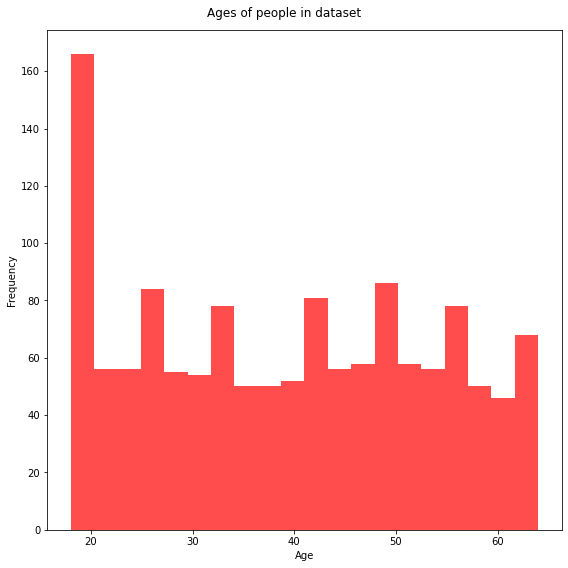

In [37]:
#Plotting ages
fig, ax = plt.subplots(figsize = (8,8))
plt.suptitle("Ages of people in dataset")
ax.hist(age_list, bins = 20, color = 'red', alpha = 0.7)
ax.set(xlabel = "Age", ylabel = "Frequency")
plt.tight_layout()
plt.show()

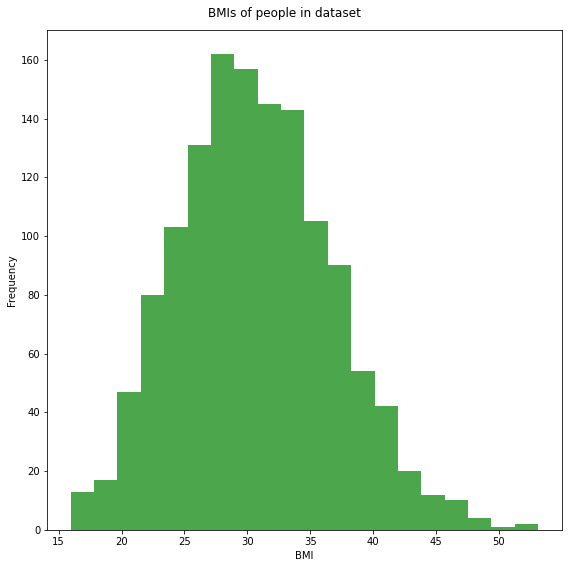

In [39]:
#Plotting BMIs
fig, ax = plt.subplots(figsize = (8,8))
plt.suptitle("BMIs of people in dataset")
ax.hist(bmi_list, bins = 20, color = 'green', alpha = 0.7)
ax.set(xlabel = "BMI", ylabel = "Frequency")
plt.tight_layout()
plt.show()

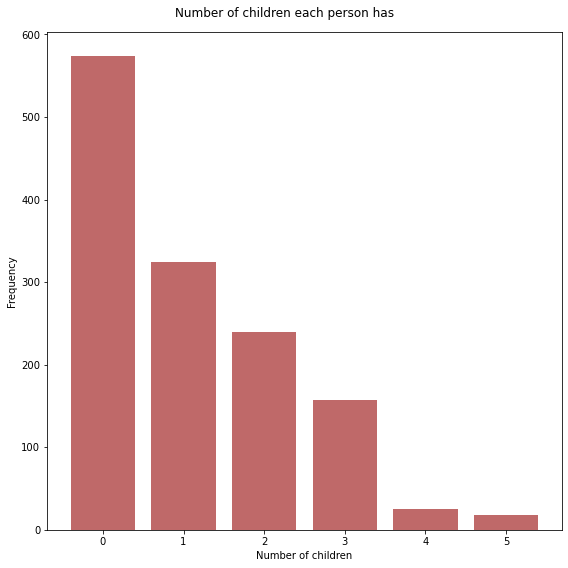

In [49]:
#Plotting no. children
fig, ax = plt.subplots(figsize = (8,8))
plt.suptitle("Number of children each person has")
ax.bar(np.unique(children_list), np.unique(children_list, return_counts=True)[1], color = 'brown', alpha = 0.7)
ax.set(xlabel = "Number of children", ylabel = "Frequency")
plt.tight_layout()
plt.show()

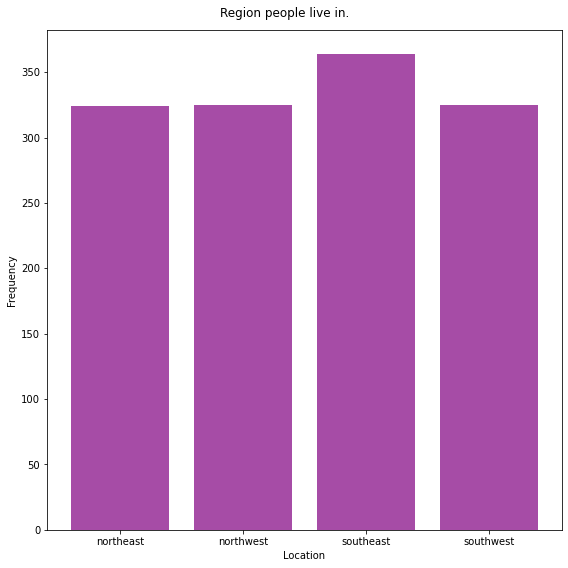

In [60]:
#Plotting locations
fig, ax = plt.subplots(figsize = (8,8))
plt.suptitle("Region people live in.")
ax.bar(np.unique(region_list), np.unique(region_list, return_counts=True)[1], color = 'purple', alpha = 0.7)
ax.set(xlabel = "Location", ylabel = "Frequency")
plt.tight_layout()
plt.show()

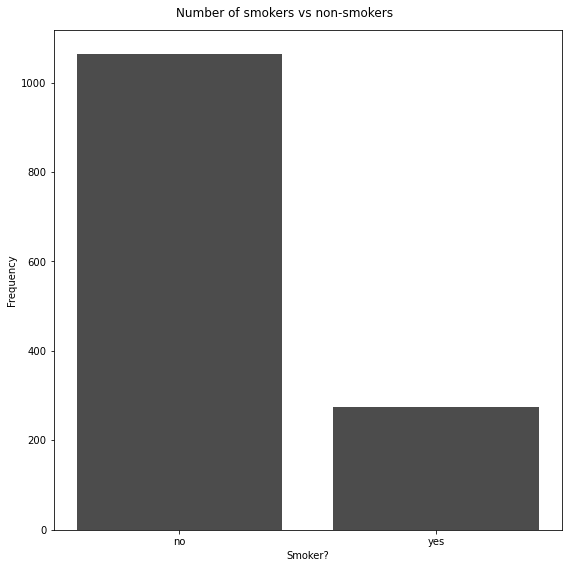

In [72]:
#Plotting smokers vs non smokers
fig, ax = plt.subplots(figsize = (8,8))
plt.suptitle("Number of smokers vs non-smokers")
ax.bar(np.unique(smoker_list), np.unique(smoker_list, return_counts=True)[1], color = 'black', alpha = 0.7)
ax.set(xlabel = "Smoker?", ylabel = "Frequency")
plt.tight_layout()
plt.show()

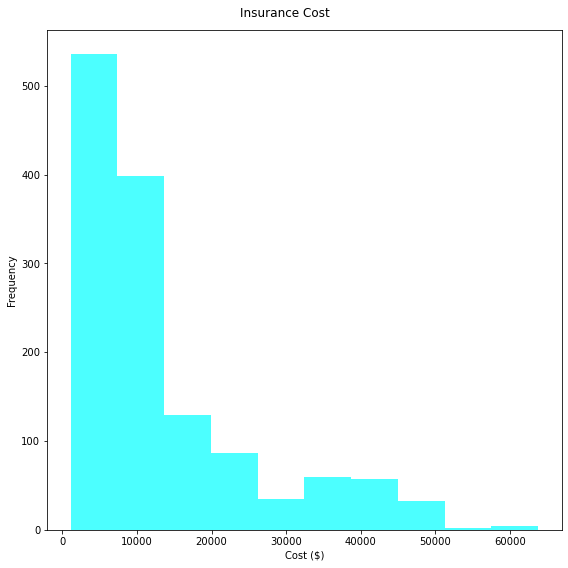

In [63]:
#Plotting cost
fig, ax = plt.subplots(figsize = (8,8))
plt.suptitle("Insurance Cost")
ax.hist(charges_list, color = 'cyan', alpha = 0.7)
ax.set(xlabel = "Cost ($)", ylabel = "Frequency")
plt.tight_layout()
plt.show()

## Looking for correlations to the insurance cost

In [105]:
#Finding smokers
num_people = len(age_list)
smoker_ages = []
smoker_charges = []
smoker_children = []
nonsmoker_ages = []
nonsmoker_children = []
nonsmoker_charges = []
smoker_bmi = []
nonsmoker_bmi = []

for index in range(num_people):
    smoker = smoker_list[index]
    charge = charges_list[index]
    age = age_list[index]
    bmi = bmi_list[index]
    children = children_list[index]
    if smoker =='yes':
        smoker_ages.append(age)
        smoker_children.append(children)
        smoker_bmi.append(bmi)
        smoker_charges.append(charge)
    elif smoker == 'no':
        nonsmoker_ages.append(age)
        nonsmoker_children.append(children)
        nonsmoker_charges.append(charge)
        nonsmoker_bmi.append(bmi)
    else:
        print("Issue with index {}.".format(index))

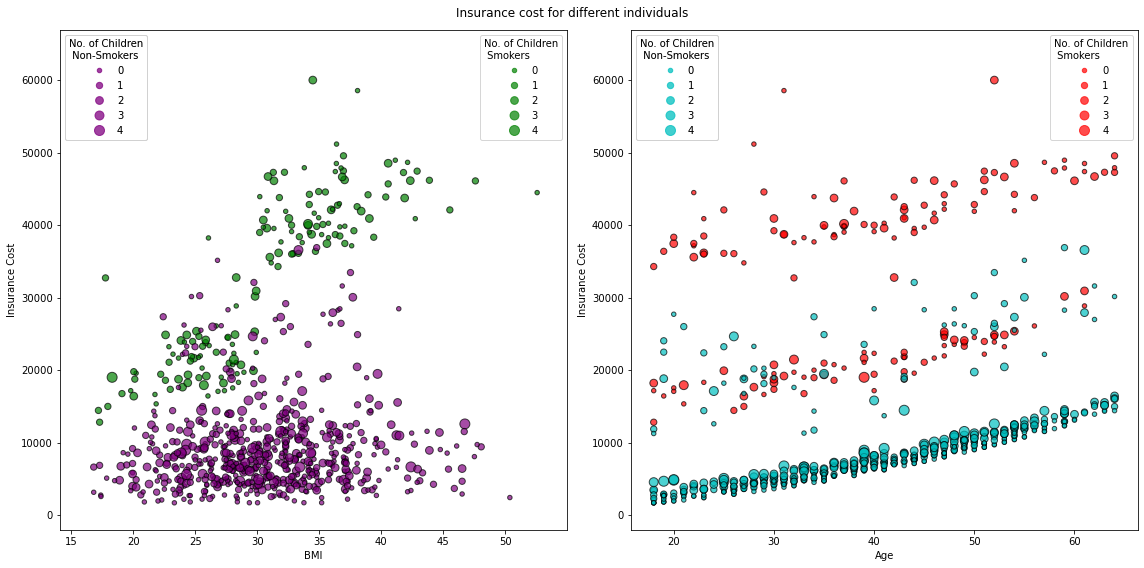

In [192]:
# Comparing Smokers and Non-smokers for BMI and age ranges
fig, ax = plt.subplots(1, 2, figsize = (16, 8))
plot = ax[0].scatter(smoker_bmi, smoker_charges, s = np.multiply(smoker_children, 20), label = "Smokers", edgecolors='black', color = 'green', alpha = 0.7)
plot2 = ax[0].scatter(nonsmoker_bmi, nonsmoker_charges, s = np.multiply(nonsmoker_children, 20), label = "Non Smokers", edgecolors='black', color = 'purple', alpha = 0.7)
ax[0].set(xlabel="BMI", ylabel = "Insurance Cost")
handles1, labels1 = plot.legend_elements(prop="sizes", alpha=0.7, num=6, color = 'green') 
handles2, labels2 = plot2.legend_elements(prop="sizes", alpha=0.7, num=6, color = 'purple')
labels = ["0", "1", "2", "3", "4", "5"]
legend1 = ax[0].legend(handles1, labels, loc="upper right", title="No. of Children\n Smokers")
legend2 = ax[0].legend(handles2, labels, loc = "upper left", title="No. of Children\n Non-Smokers")
ax[0].add_artist(legend1)
ax[0].add_artist(legend2)

plot = ax[1].scatter(smoker_ages, smoker_charges, s = np.multiply(smoker_children, 20), label = "Smokers", edgecolors='black', color = 'red', alpha = 0.7)
plot2 = ax[1].scatter(nonsmoker_ages, nonsmoker_charges, s = np.multiply(nonsmoker_children, 20), label = "Non Smokers", edgecolors='black', color = 'c', alpha = 0.7)
ax[1].set(xlabel="Age", ylabel = "Insurance Cost")
handles1, labels1 = plot.legend_elements(prop="sizes", alpha=0.7, num=6, color = 'red') 
handles2, labels2 = plot2.legend_elements(prop="sizes", alpha=0.7, num=6, color = 'c')
labels = ["0", "1", "2", "3", "4", "5"]
legend1 = ax[1].legend(handles1, labels, loc="upper right", title="No. of Children\n Smokers")
legend2 = ax[1].legend(handles2, labels, loc = "upper left", title="No. of Children\n Non-Smokers")
ax[1].add_artist(legend1)
ax[1].add_artist(legend2)


plt.suptitle("Insurance cost for different individuals")
plt.tight_layout()
plt.show()

So it can be seen that smoking has a huge impact on the insurance cost, as expected. BMI only appears to be of importance for smokers aswell!
Number of Children does not appears to have such a clear relationship.

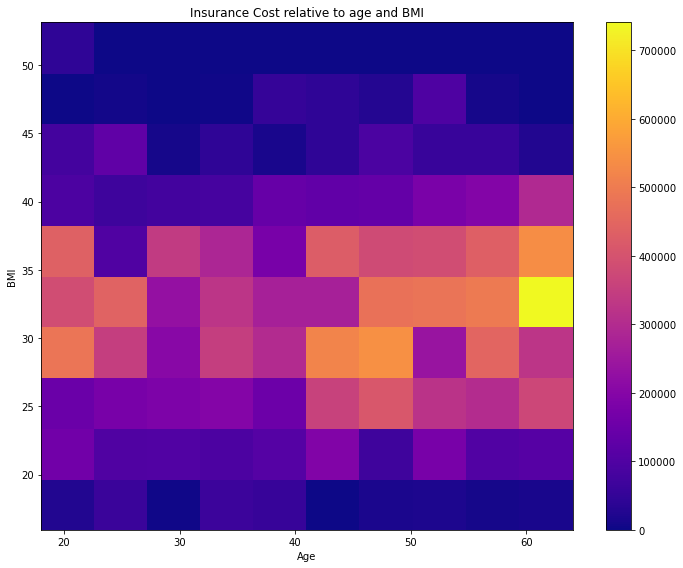

In [182]:
# Testing if relationship between the effect of importance of BMI and age relative to each other
fig, ax = plt.subplots(figsize=(10,8))
histo = ax.hist2d(age_list, bmi_list, weights=charges_list, cmap = 'plasma')
ax.set(xlabel = "Age", ylabel = "BMI", title = "Insurance Cost relative to age and BMI")
cbar = fig.colorbar(histo[3], ax=ax)
plt.tight_layout()
plt.show()

There does not appear to be much difference in how BMI affects insurance costs with age!

In [184]:
#Finding those in different regions
northwest_charge = []
northeast_charge = []
southwest_charge = []
southeast_charge = []
northwest_kids = []
northeast_kids = []
southwest_kids = []
southeast_kids = []
northwest_bmi = []
northeast_bmi = []
southwest_bmi = []
southeast_bmi = []

for index in range(num_people):
    region = region_list[index]
    bmi = bmi_list[index]
    num_kids = children_list[index]
    charge = charges_list[index]
    if region=='northeast':
        northeast_charge.append(charge)
        northeast_kids.append(num_kids)
        northeast_bmi.append(bmi)
    elif region == 'northwest':
        northwest_charge.append(charge)
        northwest_kids.append(num_kids)
        northwest_bmi.append(bmi)
    elif region == 'southwest':
        southwest_charge.append(charge)
        southwest_kids.append(num_kids)
        southwest_bmi.append(bmi)
    elif region == 'southeast':
        southeast_charge.append(charge)
        southeast_kids.append(num_kids)
        southeast_bmi.append(bmi)
    else:
        print("Problem with index {}.".format(index))

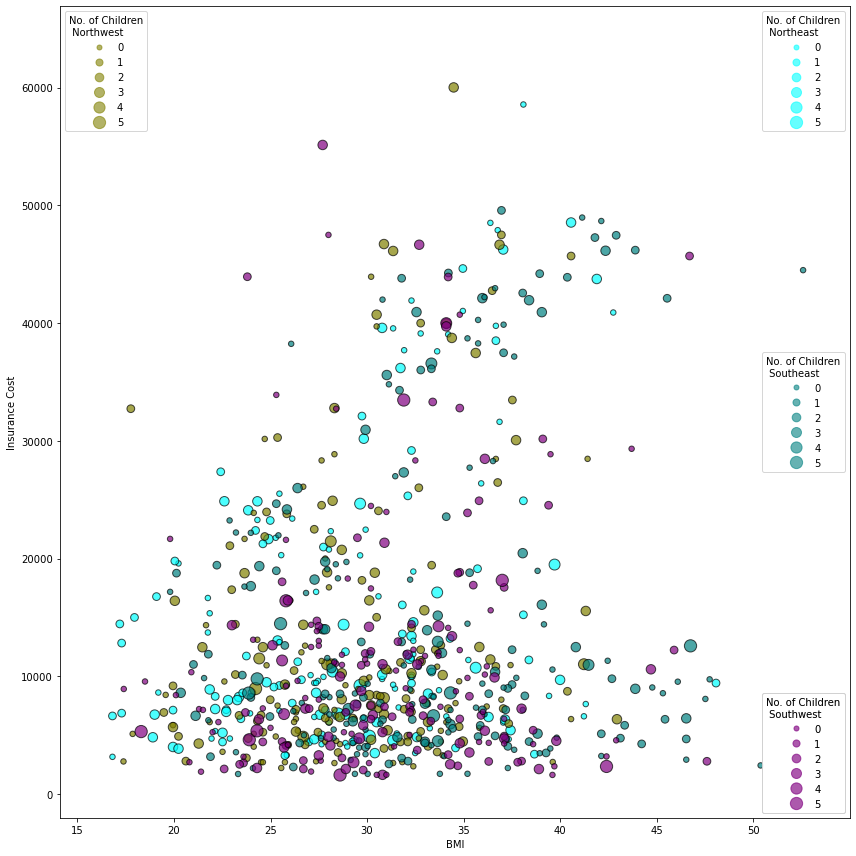

In [207]:
#Plotting to compare
fig, ax = plt.subplots(figsize = (12,12))
plot = ax.scatter(northeast_bmi, northeast_charge, s = np.multiply(northeast_kids, 30), label = "Northeast", color='cyan',alpha=0.7, edgecolors='black')
plot2 = ax.scatter(northwest_bmi, northwest_charge, s = np.multiply(northwest_kids, 30), label = "Northwest", color = 'olive', alpha = 0.7, edgecolors='black')
plot3 = ax.scatter(southeast_bmi, southeast_charge, s = np.multiply(southeast_kids, 30), label = "Southeast", color = 'teal', alpha= 0.7, edgecolors='black')
plot4 = ax.scatter(southwest_bmi, northwest_charge, s = np.multiply(southwest_kids, 30), label = "Southwest", color = 'purple', alpha=0.7, edgecolors='black')

ax.set(xlabel="BMI", ylabel = "Insurance Cost")
handles1, labels1 = plot.legend_elements(prop="sizes", alpha=0.6, num=6, color = 'cyan') 
handles2, labels2 = plot2.legend_elements(prop="sizes", alpha=0.6, num=6, color = 'olive')
handles3, labels3 = plot3.legend_elements(prop="sizes", alpha=0.6, num=6, color = 'teal') 
handles4, labels4 = plot4.legend_elements(prop="sizes", alpha=0.6, num=6, color = 'purple')
labels = ["0", "1", "2", "3", "4", "5"]
legend1 = ax.legend(handles1, labels, loc="upper right", title="No. of Children\n Northeast")
legend2 = ax.legend(handles2, labels, loc = "upper left", title="No. of Children\n Northwest")
legend3 = ax.legend(handles3, labels, loc="right", title="No. of Children\n Southeast")
legend4 = ax.legend(handles4, labels, loc = "lower right", title="No. of Children\n Southwest")
ax.add_artist(legend1)
ax.add_artist(legend2)
ax.add_artist(legend3)
ax.add_artist(legend4)

plt.tight_layout()
plt.show()

There appears to be few, to no relationship between the location and the insurance cost.

### Calculating the mutual information between the variables and the cost. 

In [234]:
# 'One-hot encoding' the string-based variables
onehot_smoker = np.searchsorted(np.unique(smoker_list), smoker_list)
onehot_sex = np.searchsorted(np.unique(sex_list), sex_list)
onehot_region = np.searchsorted(np.unique(region_list), region_list)
features = np.stack([age_list, bmi_list, children_list, onehot_region, onehot_sex, onehot_smoker], axis=-1)
print(np.shape(features)) # Check the shape is correct

(1338, 6)


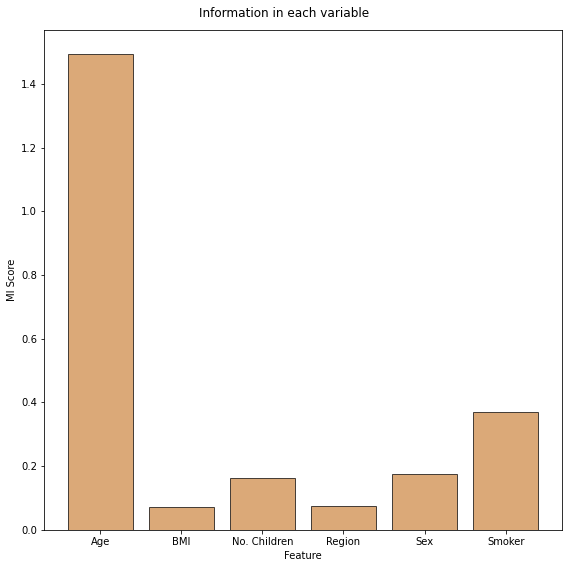

In [230]:
# Finding the mutual information and plotting
m_info = mutual_info_regression(features, charges_list)
fig, ax = plt.subplots(figsize = (8,8))
xs = ["Age", "BMI", "No. Children", "Region", "Sex", "Smoker"]
ax.bar(xs, m_info, alpha= 0.7, color = 'peru', edgecolor = 'black')
ax.set(xlabel = "Feature", ylabel = "MI Score")
plt.suptitle("Information in each variable")
plt.tight_layout()
plt.show()

Age likely has the highest MI as it can take on many values, but also has a significant impact. Smoker, on the other hand, can only take two values. Despite this, it still has a very high MI score. Accounting for this better with an F-statistic:

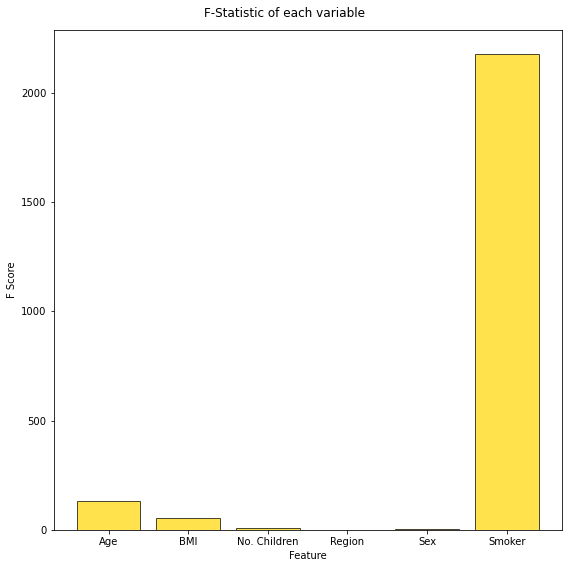

In [243]:
# Finding the F-statistic and plotting
f_vals = f_regression(features, charges_list)[0]
fig, ax = plt.subplots(figsize = (8,8))
xs = ["Age", "BMI", "No. Children", "Region", "Sex", "Smoker"]
ax.bar(xs, f_vals, alpha= 0.7, color = 'gold', edgecolor = 'black')
ax.set(xlabel = "Feature", ylabel = "F Score")
plt.suptitle("F-Statistic of each variable")
plt.tight_layout()
plt.show()

Order agrees with above observations perfectly. Smoking has the highest impact, followed by age, bmi, number of children, sex, and region, with the final 3 contributing insignificantly.